In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Train (3).csv")

In [ ]:
df.head(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [ ]:
X.shape


(42000, 784)

In [ ]:
Y.shape

(42000,)

In [ ]:
if not isinstance(X,pd.DataFrame):
  X=pd.DataFrame(X)
  X=X.apply(pd.to_numeric,error='coerce')
  X=X.fillna(0)
  X=X.values/255
  X=X.reshape(-1,28,28,1)
  X.shape

In [ ]:
X.shape

(42000, 784)

In [ ]:
y=to_categorical(Y,num_classes=10)
y.shape

(42000, 10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(33600, 784)

In [ ]:
model=Sequential([
    Input(shape=(784,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Remove reshaping as the model expects flattened input
# X_train = X_train.reshape(-1, 28, 28, 1)
# X_val   = X_val.reshape(-1, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_val   = X_val.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import backend as K

K.clear_session()

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.1072 - loss: 2.3021 - val_accuracy: 0.1082 - val_loss: 2.3015
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.1125 - loss: 2.3015 - val_accuracy: 0.1082 - val_loss: 2.3011
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.1119 - loss: 2.3012 - val_accuracy: 0.1082 - val_loss: 2.3012
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.1108 - loss: 2.3012 - val_accuracy: 0.1082 - val_loss: 2.3010
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.1124 - loss: 2.3016 - val_accuracy: 0.1082 - val_loss: 2.3010
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.1128 - loss: 2.3013 - val_accuracy: 0.1082 - val_loss: 2.3013
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 62s 59ms/step - accuracy: 0.1119 - loss: 2.3015 - val_accuracy: 0.1082 - val_loss: 2.3013
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 63s 60ms/step - accuracy: 0.1114 -

263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9682 - loss: 0.1297
Validation Accuracy: 96.89%


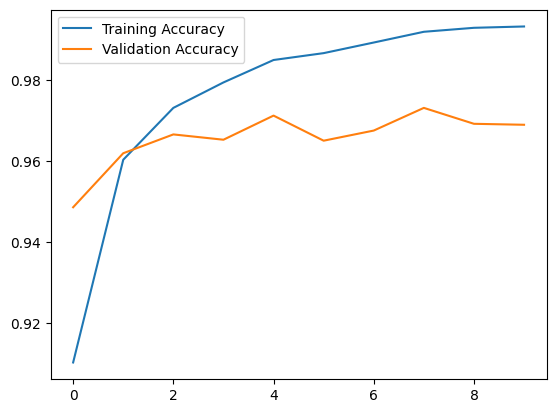

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


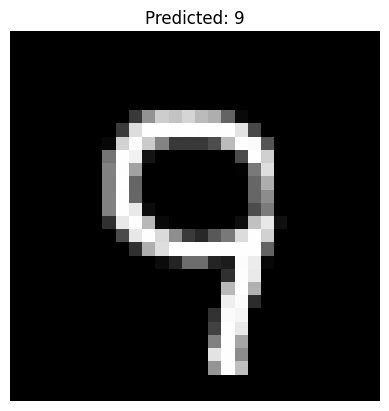

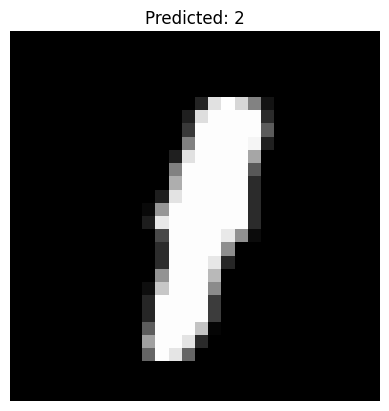

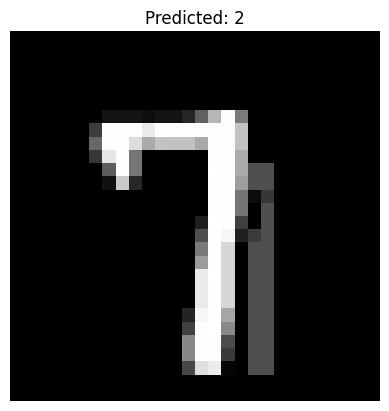

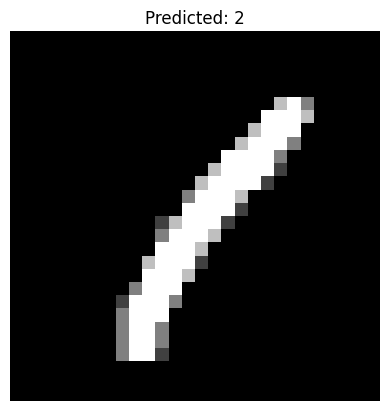

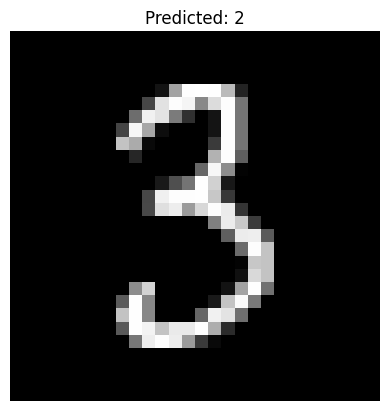

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
X_test = test_data.values / 255.0
# Remove reshaping as the model expects flattened input
# X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()